# Shap Values example

## The algorithm

    1. Average Prediction Baseline: 
        -First, calculate the average prediction of the model across all the data points. This serves as a baseline to compare against.
    2. Marginal Contribution Calculation:
        - For a given feature, consider all possible subsets of the other features. For each subset, calculate the difference in the model's prediction with the feature present and absent.
    3. Consider All Possible Coalitions:
        - The Shapley value algorithm iterates through all possible combinations (coalitions) of features. For each combination, it computes the contribution of adding a particular feature to the existing set.
    4. Averaging Marginal Contributions:
        - The Shapley value for a feature is the average of its marginal contributions across all possible combinations of the other features.
        - This average is weighted by the number of ways each coalition can be formed, ensuring fairness and taking into account the size of the feature set.

### imports

In [13]:
import shap
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

### train model

In [22]:
# Load the California Housing dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of training data:', X_train.shape)

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)


Shape of training data: (16512, 8)


GradientBoostingRegressor(random_state=0)

### Shap values

In [18]:
# Create a SHAP explainer object
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)



In [23]:
X_test.shape, shap_values.shape

((4128, 8), (4128, 8))

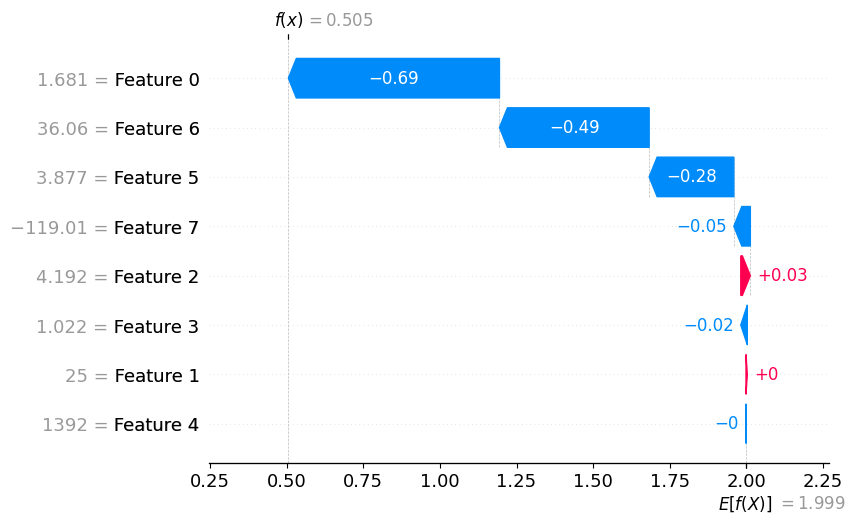

In [24]:
# Plot the SHAP values for the first test data point
shap.plots.waterfall(shap_values[0])
